<h1>Explorartory Data Analysis</h1>

In [2]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
# to save model
import joblib

In [5]:
#Reading csv file
df = pd.read_csv('data/train.csv')
df.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [6]:
df.tail()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
320,321,F,13,U,GT3,T,4,4,1,2,...,no,yes,yes,yes,yes,2,4,4,2,39
321,322,F,12,U,GT3,T,2,2,3,3,...,no,no,yes,yes,yes,4,2,1,8,43
322,323,F,14,R,GT3,T,3,2,1,2,...,no,no,yes,no,yes,3,3,3,0,27
323,324,M,13,U,LE3,T,4,3,2,1,...,no,yes,yes,yes,yes,4,2,1,0,30
324,325,M,13,U,GT3,T,1,2,2,1,...,no,no,no,no,yes,3,4,4,10,31


In [7]:
df.rename(columns={'S/N': 'RollNo'}, inplace = True)

In [8]:
#features of the dataset
df.columns

Index(['RollNo', 'Gender', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel',
       'freetime', 'health', 'absences', 'Score'],
      dtype='object')

In [9]:
#Representation of the statistical data
df.describe()

,RollNo,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,163.000000,11.320000,2.710769,2.476923,1.449231,1.956923,0.184615,3.926154,3.178462,3.590769,4.341538,35.713846
std,93.963645,1.123157,1.086977,1.093015,0.725234,0.819133,0.579812,0.913256,0.987029,1.438634,5.200038,6.732175
min,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,82.000000,10.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,0.000000,31.000000
50%,163.000000,11.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,4.000000,2.000000,36.000000
75%,244.000000,12.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,5.000000,6.000000,40.000000
max,325.000000,17.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,32.000000,53.000000


In [10]:
df.isnull().sum()

RollNo        0
Gender        0
Age           0
Location      0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
health        0
absences      0
Score         0
dtype: int64

As per the above data there are no null values present

In [11]:
#Checking the duplicate data
df.duplicated().sum()

0

In [12]:
corr = df.corr()
corr

,RollNo,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
RollNo,1.000000,0.673927,-0.209204,-0.175051,0.083653,-0.047959,0.071664,-0.047764,-0.073978,-0.075734,0.185527,-0.078188
Age,0.673927,1.000000,-0.146428,-0.192583,0.035163,-0.068840,0.307116,-0.019017,-0.062809,-0.033313,0.270823,-0.218478
Medu,-0.209204,-0.146428,1.000000,0.625634,-0.210531,0.089956,-0.203949,-0.002927,0.019491,-0.030529,-0.032706,0.234127
Fedu,-0.175051,-0.192583,0.625634,1.000000,-0.162093,-0.004561,-0.178322,0.019931,0.018134,0.008697,0.059223,0.173798
traveltime,0.083653,0.035163,-0.210531,-0.162093,1.000000,-0.092015,0.081078,0.008302,-0.030421,-0.036245,0.037758,-0.123410
studytime,-0.047959,-0.068840,0.089956,-0.004561,-0.092015,1.000000,-0.210651,-0.024894,-0.127890,-0.070006,-0.129136,0.219394
failures,0.071664,0.307116,-0.203949,-0.178322,0.081078,-0.210651,1.000000,-0.009147,0.098652,0.046451,0.174544,-0.408658
famrel,-0.047764,-0.019017,-0.002927,0.019931,0.008302,-0.024894,-0.009147,1.000000,0.155049,0.160162,-0.086311,0.007596
freetime,-0.073978,-0.062809,0.019491,0.018134,-0.030421,-0.127890,0.098652,0.155049,1.000000,0.095062,-0.046790,-0.050816
health,-0.075734,-0.033313,-0.030529,0.008697,-0.036245,-0.070006,0.046451,0.160162,0.095062,1.000000,-0.064186,-0.157126


<h3>Data Visualizations</h3>

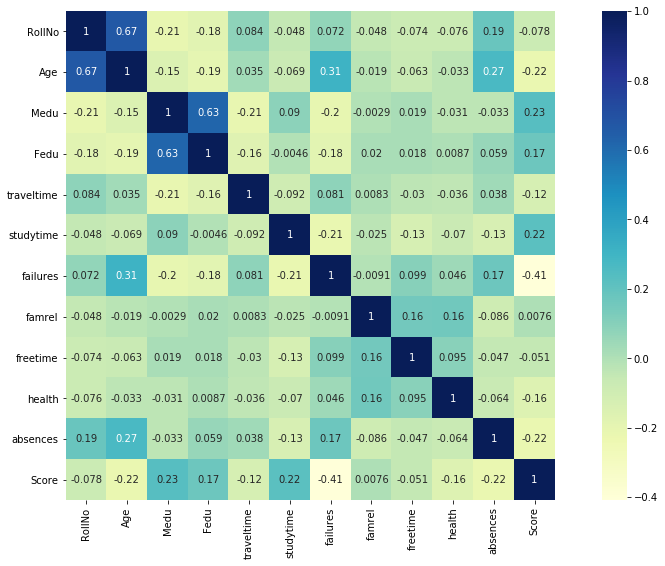

In [46]:
plt.figure(figsize = (17, 9))
sns.heatmap(corr, annot = True, cmap="YlGnBu", square=True)

Visualising between score and failures

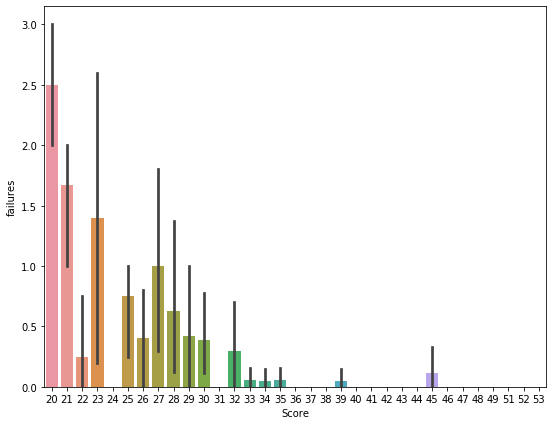

In [14]:
plt.figure(figsize = (9, 7))
sns.barplot(x = 'Score', y ='failures', data = df)

As per the above visualizations you can see If scores are low there is high chance of failure which impacts performance.

Visualizing between Internet and the score

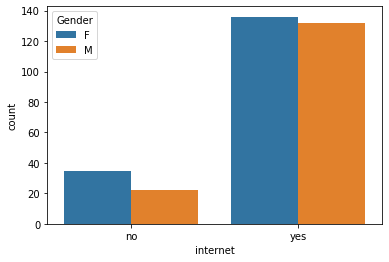

In [15]:
#univariate Analysis for finding how many people using internet
sns.countplot(x = 'internet',data = df, hue = 'Gender')

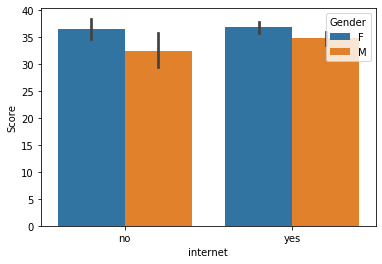

In [16]:
sns.barplot(x = 'internet', y = 'Score', data = df, hue = 'Gender')

So As per the above two visualizations there are huge number of students using internet but it slightly helped to improve the performance of students

Visualizing data between family-size and scores

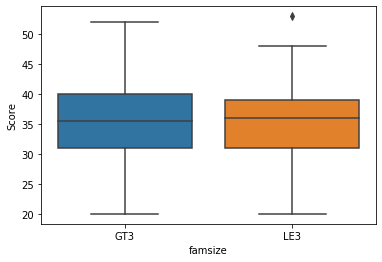

In [17]:
sns.boxplot(x='famsize',y='Score',data=df)

As we can see if the family members are Greater than 3 that students are well performing than LE3 .  

Visualizing between Scores and absences

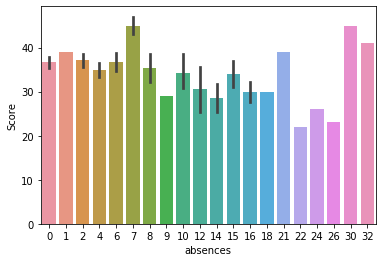

In [18]:
sns.barplot(x = 'absences', y = 'Score', data = df)

Visualization between mother education and score

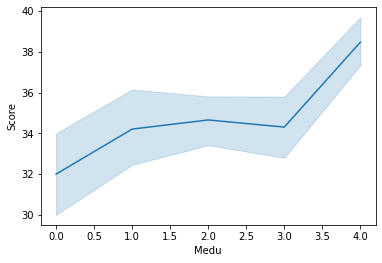

In [19]:
sns.lineplot(x = 'Medu', y = 'Score', data = df)

It is showing positive correlation between Medu and Students Score

Visualization between mother education and score

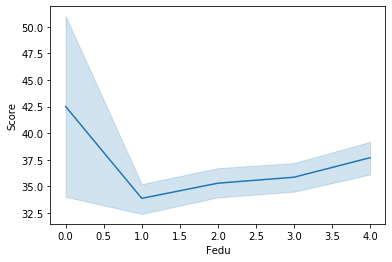

In [20]:
sns.lineplot(x = 'Fedu', y = 'Score', data = df)

Visualizing between Study Time and Score

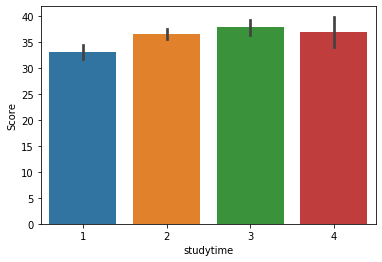

In [21]:
sns.barplot(x = 'studytime', y = 'Score', data = df)

Above Visualizations are showing the increasing trends for those study upto 10 hours but it is slightly low for those studying >= 10 hours

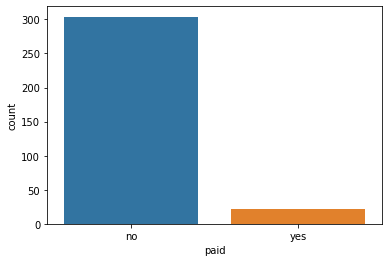

In [22]:
sns.countplot(x = 'paid', data = df)

So there are less number of students who have paid for extra classes.

Univariate analysis for activities

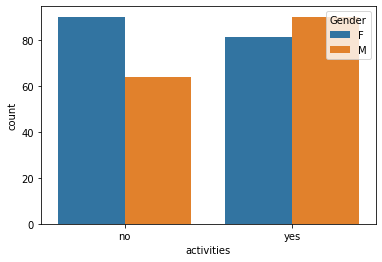

In [23]:
sns.countplot(x = 'activities', data = df, hue = 'Gender')

Female students are taking more part in extra curricular activities

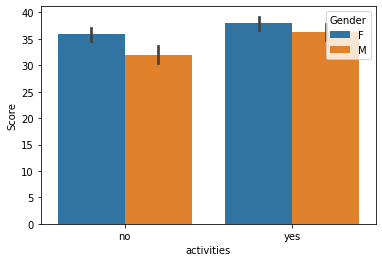

In [24]:
sns.barplot(x = 'activities', y = 'Score', data = df, hue = 'Gender')

So From the above visualizations those who are taking part in extra curricular activities are having high scores then those who are not taking part

Visualizing between free time and score

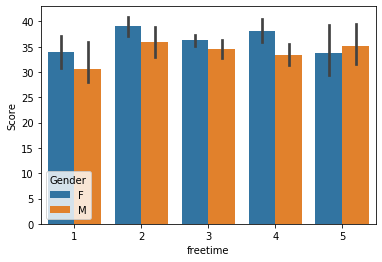

In [25]:
sns.barplot(x = 'freetime', y = 'Score', data = df, hue = 'Gender')

Above visualizations show no relations between freetime and students performance

Visualizing between Pstatus and Score

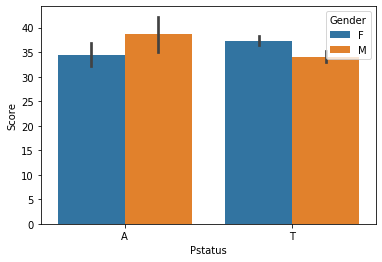

In [26]:
sns.barplot(x = 'Pstatus', y = 'Score', data = df, hue = 'Gender')

Visualizing between Health and Score

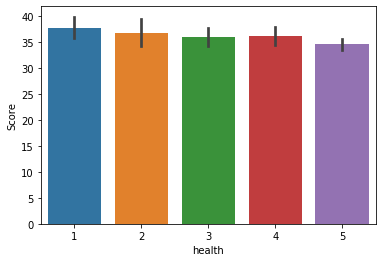

In [27]:
sns.barplot(x = 'health', y = 'Score', data = df)

Visualizing between Location and Score

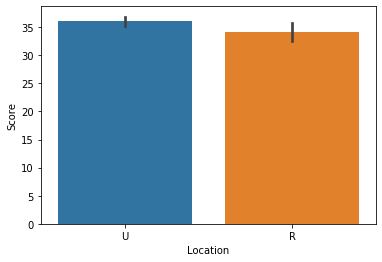

In [28]:
sns.barplot(x = 'Location', y = 'Score', data = df)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RollNo      325 non-null    int64 
 1   Gender      325 non-null    object
 2   Age         325 non-null    int64 
 3   Location    325 non-null    object
 4   famsize     325 non-null    object
 5   Pstatus     325 non-null    object
 6   Medu        325 non-null    int64 
 7   Fedu        325 non-null    int64 
 8   traveltime  325 non-null    int64 
 9   studytime   325 non-null    int64 
 10  failures    325 non-null    int64 
 11  schoolsup   325 non-null    object
 12  famsup      325 non-null    object
 13  paid        325 non-null    object
 14  activities  325 non-null    object
 15  nursery     325 non-null    object
 16  higher      325 non-null    object
 17  internet    325 non-null    object
 18  famrel      325 non-null    int64 
 19  freetime    325 non-null    int64 
 20  health    

In [30]:
# sns.pairplot(df)
# plt.show()

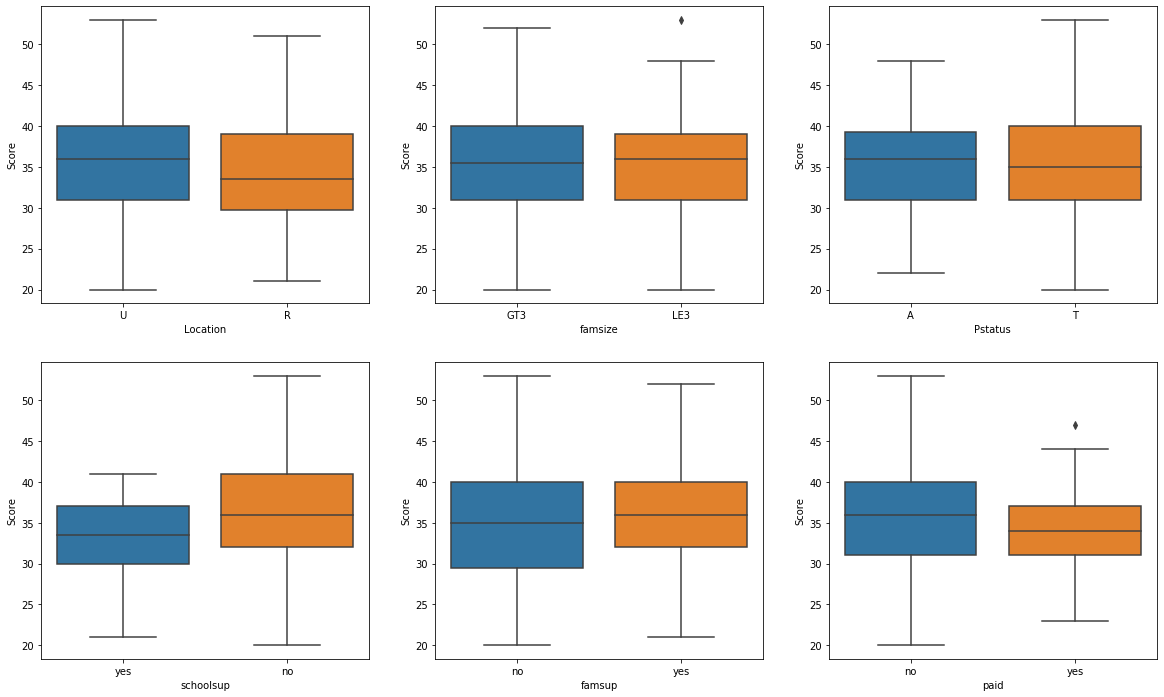

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Location', y = 'Score', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'famsize', y = 'Score', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Pstatus', y = 'Score', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'schoolsup', y = 'Score', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'famsup', y = 'Score', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'paid', y = 'Score', data = df)
plt.show()

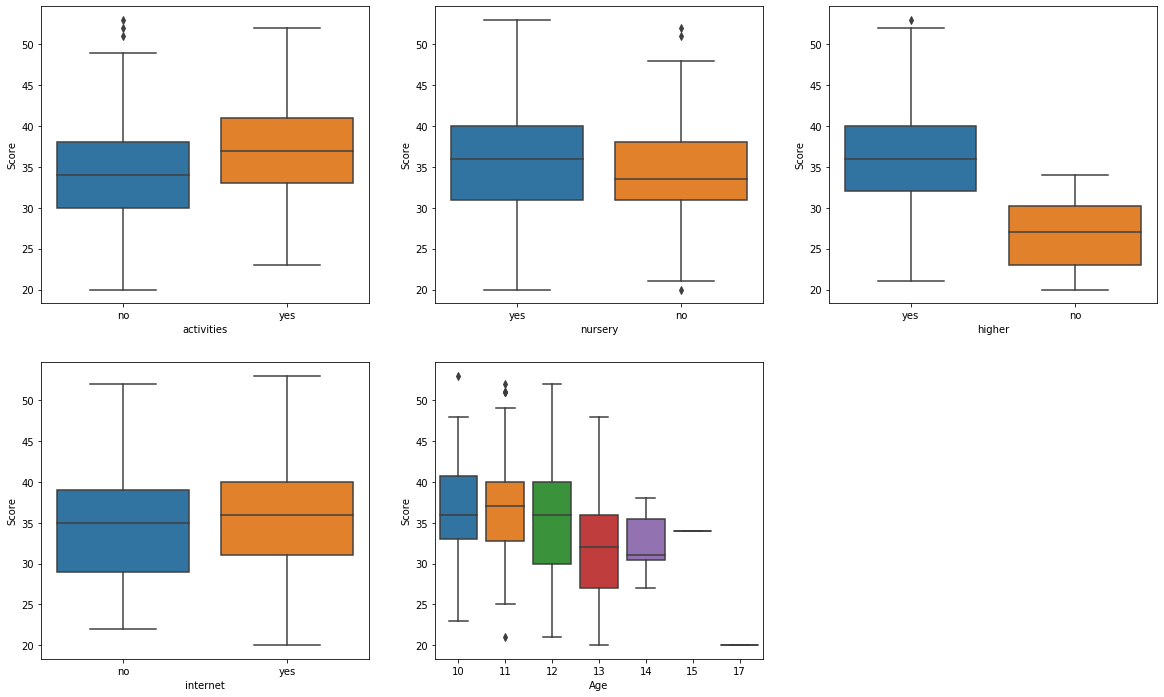

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'activities', y = 'Score', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'nursery', y = 'Score', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'higher', y = 'Score', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'internet', y = 'Score', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Age', y = 'Score', data = df)
plt.show()

In [33]:
df_target = df['Score']
df_target

0      22
1      31
2      37
3      42
4      37
       ..
320    39
321    43
322    27
323    30
324    31
Name: Score, Length: 325, dtype: int64

In [34]:
# dropping taget variable
df.drop(['Score'],axis=1,inplace=True)

In [35]:
# droping corelated columns for model complexity
df.drop(["RollNo","Fedu","Medu","Pstatus","schoolsup","famsup","famrel","absences"], axis=1, inplace=True)

In [36]:
df.columns

Index(['Gender', 'Age', 'Location', 'famsize', 'traveltime', 'studytime',
       'failures', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'freetime', 'health'],
      dtype='object')

In [37]:
# dividing dataset into numerical and categorical dataset
num_df = df.loc[:,df.dtypes!=np.object]
cat_df = df.loc[:,df.dtypes==np.object]

In [38]:
num_df.head()

,Age,traveltime,studytime,failures,freetime,health
0,13,2,2,0,3,3
1,12,1,2,0,3,3
2,10,1,2,0,3,3
3,10,1,3,0,2,5
4,11,1,2,0,3,5


In [39]:
cat_df.head()

,Gender,Location,famsize,paid,activities,nursery,higher,internet
0,F,U,GT3,no,no,yes,yes,no
1,F,U,GT3,no,no,no,yes,yes
2,F,U,LE3,no,no,yes,yes,yes
3,F,U,GT3,no,yes,yes,yes,yes
4,F,U,GT3,no,no,yes,yes,no


In [40]:
le = LabelEncoder()
cat_df = cat_df.apply(le.fit_transform)
cat_df.head()

,Gender,Location,famsize,paid,activities,nursery,higher,internet
0,0,1,0,0,0,1,1,0
1,0,1,0,0,0,0,1,1
2,0,1,1,0,0,1,1,1
3,0,1,0,0,1,1,1,1
4,0,1,0,0,0,1,1,0


In [41]:
le.classes_

array(['no', 'yes'], dtype=object)

In [47]:
# saving label enconder
output = open('model/labelEncoder.pkl', 'wb')
joblib.dump(le, output)
output.close()

In [48]:
df = num_df.join(cat_df)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         325 non-null    int64
 1   traveltime  325 non-null    int64
 2   studytime   325 non-null    int64
 3   failures    325 non-null    int64
 4   freetime    325 non-null    int64
 5   health      325 non-null    int64
 6   Gender      325 non-null    int64
 7   Location    325 non-null    int64
 8   famsize     325 non-null    int64
 9   paid        325 non-null    int64
 10  activities  325 non-null    int64
 11  nursery     325 non-null    int64
 12  higher      325 non-null    int64
 13  internet    325 non-null    int64
dtypes: int64(14)
memory usage: 35.7 KB


In [55]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3,random_state=109) # 70% training and 30% test

---
RandomForestClassifier

In [58]:
model = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [60]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)

In [64]:
CV_rfc.fit(X_train, y_train)

/home/codeperfectplus/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=None,
                                              oob_score=False,
                                              rando

In [65]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [74]:
pipeline = Pipeline(steps=[('model', RandomForestClassifier(criterion= 'gini', 
                                                            max_depth= 4,
                                                            max_features= 'auto',
                                                            n_estimators= 500)
                           )])

In [78]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=4, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [79]:
y_predict = pipeline.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.061224489795918366


In [80]:
#classification error
print("Classification error is",1- metrics.accuracy_score(y_test, y_predict, normalize = True))
#sensitivity
print("sensitivity is", metrics.recall_score(y_test, y_predict, labels=None, average =  'micro', sample_weight=None))
#specificity
print("specificity is", 1 - metrics.recall_score(y_test, y_predict,labels=None, average =  'micro', sample_weight=None))

Classification error is 0.9387755102040817
sensitivity is 0.061224489795918366
specificity is 0.9387755102040817


In [81]:
output = open('model/model2.pkl', 'wb')
joblib.dump(pipeline, output)
output.close()